In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math

In [2]:
# Ruta del archivo Excel
ruta_archivo = "C://Users//Alienware X15//Desktop//tesis//BDlimpio.xlsx"
#df = pd.read_excel(ruta_archivo,sheet_name="Valores")

# Leer el archivo Excel y seleccionar solo las columnas "A", "C", y "E"
df = pd.read_excel(ruta_archivo,usecols=[ 'SDT', 'DQO_TOT', 'pH_CAMPO', 'TEMP_AMB', 'OD_%','P_TOT'])

# Mostrar las primeras filas del DataFrame
print(df.head())

   DQO_TOT   P_TOT     SDT  pH_CAMPO   OD_%  TEMP_AMB
0  27.8784  0.2475  433.28      7.97   85.8      26.7
1  16.1600  0.1814  306.56      8.02   89.8      34.6
2  25.4700  0.1387  748.80      8.27  127.6      37.4
3  32.8000  0.2574  581.76      7.97   85.5      33.0
4  30.0960  0.2010  651.52      8.14   90.5      34.8


In [3]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()

# Crear una copia del DataFrame para aplicar la normalización
df_normalizado = df.copy()

# Normalizar las columnas específicas del DataFrame
df_normalizado['OD_%'] = scaler.fit_transform(df_normalizado[['OD_%']])
df_normalizado['P_TOT'] = scaler.fit_transform(df_normalizado[['P_TOT']])
df_normalizado['SDT'] = scaler.fit_transform(df_normalizado[['SDT']])
df_normalizado['TEMP_AMB'] = scaler.fit_transform(df_normalizado[['TEMP_AMB']])
df_normalizado['DQO_TOT'] = scaler.fit_transform(df_normalizado[['DQO_TOT']])
df_normalizado['pH_CAMPO'] = scaler.fit_transform(df_normalizado[['pH_CAMPO']])



# Guardar el DataFrame normalizado en un archivo Excel
#df_normalizado.to_excel('df_normalizado.xlsx', index=False)

# Mostrar las primeras filas del DataFrame normalizado
print(df_normalizado.head())

    DQO_TOT     P_TOT       SDT  pH_CAMPO      OD_%  TEMP_AMB
0  0.016188  0.013000  0.007669  0.477143  0.404482  0.443750
1  0.005578  0.009336  0.005196  0.491429  0.425827  0.690625
2  0.014008  0.006969  0.013827  0.562857  0.627535  0.778125
3  0.020645  0.013549  0.010567  0.477143  0.402882  0.640625
4  0.018196  0.010422  0.011928  0.525714  0.429562  0.696875


X_train_scaled shape: (2413, 5)
X_test_scaled shape: (604, 5)
y_train shape: (2413,)
y_test shape: (604,)
Error Cuadrático Medio en Entrenamiento: 0.0005506393898278162
Error Cuadrático Medio en Prueba: 0.0005277709864638171
Error Absoluto Máximo en Entrenamiento: 0.5154380512431794
Error Absoluto Máximo en Prueba: 0.2661352263199149


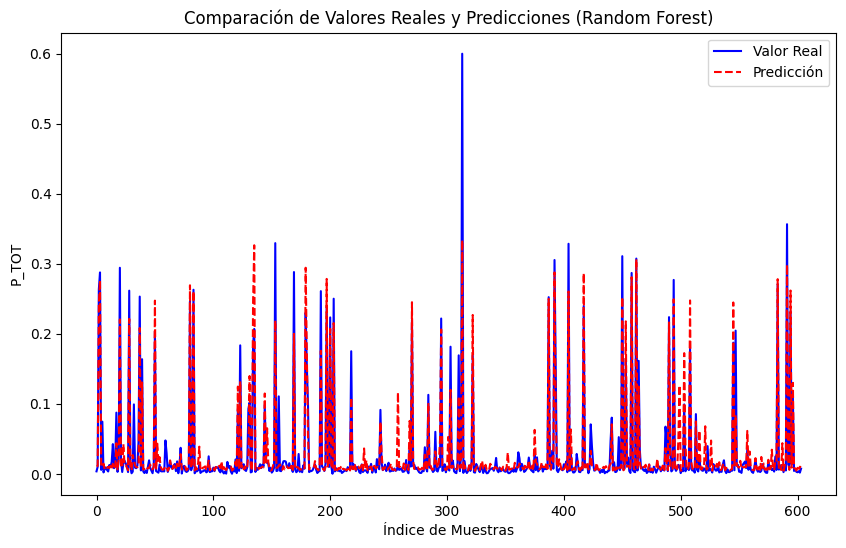

In [5]:
# Asignar las variables de entrada (X) y la variable de salida (y)
X = df_normalizado.drop(columns=['P_TOT'])  # Todas las columnas excepto 'P_TOT'
y = df_normalizado['P_TOT']  # La columna 'P_TOT' como variable de salida

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Asegurarse de que las etiquetas sean arrays unidimensionales
y_train = y_train.values
y_test = y_test.values

# Verificar las formas
print("X_train_scaled shape:", X_train.shape)
print("X_test_scaled shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Definir el modelo Random Forest ajustando hiperparámetros
rf = RandomForestRegressor(n_estimators=50, 
                           max_depth=8, 
                           min_samples_split=10, 
                           min_samples_leaf=2, 
                           max_features='sqrt', 
                           random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluar el modelo (usando el error cuadrático medio)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

# Calcular el error absoluto máximo en el conjunto de entrenamiento y prueba
max_error_train = max_error(y_train, y_pred_train)
max_error_test = max_error(y_test, y_pred_test)

print(f'Error Absoluto Máximo en Entrenamiento: {max_error_train}')
print(f'Error Absoluto Máximo en Prueba: {max_error_test}')

# Visualización de las predicciones versus los valores verdaderos
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real', color='blue')
plt.plot(y_pred_test, label='Predicción', color='red', linestyle='--')
plt.legend()
plt.xlabel('Índice de Muestras')
plt.ylabel('P_TOT')
plt.title('Comparación de Valores Reales y Predicciones (Random Forest)')
plt.show()
